In [1]:
import numpy as np 
import pandas as pd 
import glob

In [1]:
import torch 

In [ ]:
upsampling_block = nn.Sequential(
    nn.ConvTranspose2d(6, 6, kernel_size=(4, 4), stride=(4, 4)),
    nn.LeakyReLU(negative_slope=0.4),
    nn.ConvTranspose2d(6, 6, kernel_size=(4, 4), stride=(4, 4)),
    nn.LeakyReLU(negative_slope=0.4),
)


In [10]:
path = "../../Private/"
events = glob.glob(f'{path}Event/**/*.npz', recursive=True)
noise = glob.glob(f'{path}Noise/**/*.npz', recursive=True)

glob.glob('/cluster/scratch/ckeusch/data/signal/train/**/*.npz', recursive=True)

['/cluster/scratch/ckeusch/data/signal/train/2009/signal_2009_004_M09_D22_CH_FUORN_HHN.npz']

In [2]:
import numpy as np 

from src.models.CleanUNet.clean_unet_pytorch import CleanUNetPytorch
from src.models.ColdDiffusion.cold_diffusion_pytorch import Unet1D
from src.models.DeepDenoiser.deep_denoiser_model import Unet2D

def get_params_model(model):

    # Count total parameters
    total_params = sum(p.numel() for p in model.parameters())

    # Count trainable parameters
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")

cleanunet = CleanUNetPytorch(channels_H=8, channels_input=3, channels_output=3, encoder_n_layers=6, tsfm_n_layers=5, tsfm_d_inner=512, tsfm_d_model=128, tsfm_n_head=8)
colddiffusion = Unet1D(dim=8)
get_params_model(cleanunet)
get_params_model(colddiffusion)

Total parameters: 1756563
Trainable parameters: 1756563
Total parameters: 348067
Trainable parameters: 348067


In [ ]:
import torch 
from safetensors.torch import load_file

path = '/cluster/scratch/ckeusch/dsl-as24-challenge-3/outputs/2024-12-08/08-31-53/model.pth/model.safetensors'

checkpoint = load_file(path)

{'decoder.0.0.bias': tensor([-0.0130,  0.0509, -0.0201,  ..., -0.0554, -0.0205,  0.0224]),
 'decoder.0.0.weight': tensor([[[-0.0534],
          [ 0.0117],
          [-0.0700],
          ...,
          [-0.0662],
          [-0.0716],
          [-0.0558]],
 
         [[-0.0096],
          [ 0.0503],
          [ 0.0537],
          ...,
          [ 0.0285],
          [ 0.0403],
          [-0.0434]],
 
         [[-0.0664],
          [-0.0454],
          [-0.0461],
          ...,
          [-0.0290],
          [ 0.0451],
          [ 0.0129]],
 
         ...,
 
         [[-0.0554],
          [ 0.0763],
          [-0.0502],
          ...,
          [ 0.0360],
          [ 0.0124],
          [ 0.0703]],
 
         [[ 0.0247],
          [-0.0169],
          [ 0.0590],
          ...,
          [-0.0269],
          [-0.0766],
          [ 0.0088]],
 
         [[-0.0247],
          [ 0.0160],
          [-0.0161],
          ...,
          [ 0.0356],
          [-0.0838],
          [-0.0635]]]),
 'decod

In [25]:
import torch
from torch.utils.data import Subset, DataLoader
from src.models.DeepDenoiser.dataset import CSVDatasetPytorch
from src.utils import Mode
from src.models.DeepDenoiser.deep_denoiser_pytorch import DeepDenoiser
import matplotlib.pyplot as plt

In [ ]:
path = '/cluster/scratch/ckeusch/dsl-as24-challenge-3/data/'
dataset = Subset(CSVDatasetPytorch(path, 6120, 0.1, 2.0, Mode.TRAIN, random=False), indices=range(20))

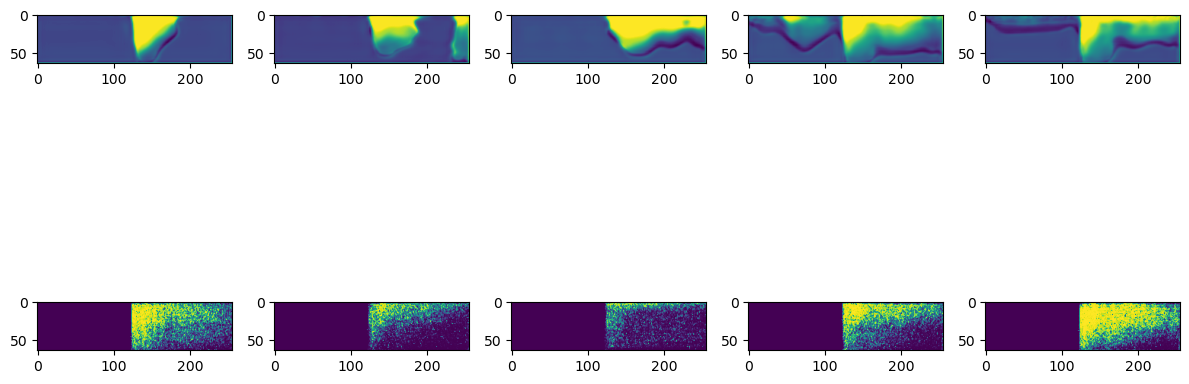

In [ ]:
model_path = "/cluster/scratch/ckeusch/dsl-as24-challenge-3/outputs/2024-12-10/16-03-14/checkpoints/epoch_100.pth"
checkpoint = torch.load(model_path,  map_location=torch.device('cpu'))
model = DeepDenoiser(3, 3, 8)
model.load_state_dict(checkpoint)
dl = DataLoader(dataset, batch_size = 1)
model.eval() 

_, axs = plt.subplots(2, len(dl) , figsize=(12, 8))
with torch.no_grad():
    for i, (noisy_eq, mask) in enumerate(dl): 
        pred = model(noisy_eq)
        axs[0,i].imshow(pred[0, 0, :, :], cmap='viridis')
        axs[1,i].imshow(mask[0, 0, :, :], cmap='viridis')


In [9]:
import keras 
from src.models.DeepDenoiser.dataset import CSVDataset
from src.models.DeepDenoiser.deep_denoiser_model_2 import UNet
from torch.utils.data import DataLoader
from src.utils import Mode

In [4]:
model = keras.saving.load_model('/cluster/scratch/ckeusch/dsl-as24-challenge-3/outputs/2024-12-10/13-35-47/checkpoints/model_at_epoch_9.keras')

2024-12-10 16:30:19.662960: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [10]:
from src.models.DeepDenoiser.dataset import CSVDataset
path = '/cluster/scratch/ckeusch/dsl-as24-challenge-3/data/'
keras_dl = DataLoader(CSVDataset(path, 6120, 0.1, 2.0, Mode.TRAIN), batch_size=1)

start loading pickle files


finished loading pickle files


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


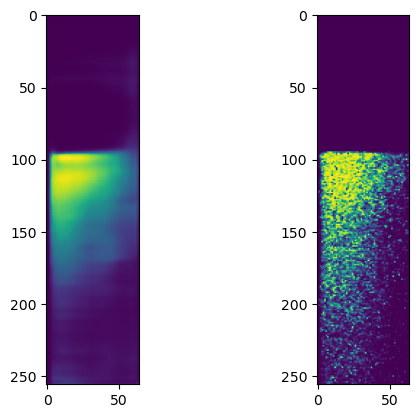

In [23]:
import os
import matplotlib.pyplot as plt
os.environ["KERAS_BACKEND"] = "jax"
noisy_eq, mask = next(iter(keras_dl))
pred = model.predict(noisy_eq)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pred[0,0,:,:])
ax[1].imshow(mask[0,0, :, :])